# A WGAN generating fake MNIST signatures

In [27]:
%matplotlib inline

import numpy as np
import scipy.io as sio
import pandas as pd
import math 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import sys 
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import autograd
from torch.autograd import Variable
import iisignature as signature

from tools import generateur_donnees, generate_noise, extrapolate_signature, gradient_penalty, extrapolate_multiple_signatures
from WGAN import *
from Training_loop_MNIST import train_MNIST
from MNIST_Plots import plot_training_results

from get_MNIST_sig import MNIST_sigs


import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

os.environ['KMP_DUPLICATE_LIB_OK']='True'



## Import trained model Training 

This WGAN-GP tries to mimic signatures of MNIST handdrawn PenDigits. Training is done in a separate Python script to avoid kernel collapse.  

In [29]:
noise_size = 8
sigorder=10
name='generator_int_3_sigorder_10_iterations_100'
signature_length = signature.siglength(2,sigorder)

WGAN = generateur_small(noise_size,248,signature_length)

#Change path to choose the model you want to load 

WGAN.load_state_dict(torch.load('trained_models/%s' % (name)))

<All keys matched successfully>

In [30]:
#Import true signatures 

true_data,nothing = MNIST_sigs(3,8)
true_data = true_data[np.random.choice(np.arange(500),10)]

## Visualising the training results

In [31]:
test_noise_size = 10

noise_size = 8

new_noise = torch.normal(mean = torch.zeros(test_noise_size,noise_size)).float()

output_fake = WGAN.forward(new_noise)

output_fake = output_fake.detach().numpy()

plot_training_results(fake_sig = output_fake, true_sig = true_data,erreur_discrim_sur_true=erreur_discrim_sur_true,test_noise_size = test_noise_size,gradient=gradient)

NameError: name 'erreur_discrim_sur_true' is not defined

## Export fake signatures for further use

In [32]:
#Export fake signatures to csv file 

new_noise = torch.normal(mean = torch.zeros(1000,noise_size)).float()

fake_sig = WGAN(new_noise)

fake_sig = fake_sig.detach().numpy()

In [33]:
pd.DataFrame(fake_sig).to_csv("%s.csv"%(name), header = None)

In [34]:
print(fake_sig)

[[-1.1737350e-01 -2.4080774e-01  1.5509447e-02 ... -1.3300184e-02
  -1.6147776e-02 -1.5702579e-02]
 [-9.4619080e-02 -2.2760266e-01  1.6163757e-02 ... -1.7938800e-02
  -2.3293737e-03 -1.5239637e-02]
 [-1.2168618e-01 -2.3334315e-01  1.7625751e-02 ... -1.0433499e-02
  -1.1760289e-02 -1.0674510e-02]
 ...
 [-1.8377402e-01 -3.1965730e-01  3.9983451e-02 ... -5.3692609e-05
   1.0267157e-02  4.1864060e-02]
 [-1.3227503e-01 -2.5496987e-01  2.9608496e-03 ...  5.6665577e-03
  -1.9331047e-02  1.7512059e-02]
 [-2.3590977e-01 -4.7843596e-01  6.7254491e-02 ...  1.9593518e-02
   7.6396890e-02 -6.3617162e-02]]


In [35]:
from insertion import invert_signature

In [38]:
sample_sig=fake_sig[0,:]
fake_path=invert_signature(torch.tensor(sample_sig).view(1,-1),sigorder-1,0,2)

Elapsed time for getting A 0.11075186729431152
Elapsed time for svd 0.011799097061157227
Elapsed time for getting A 0.09872794151306152
Elapsed time for svd 0.011990070343017578
Elapsed time for getting A 0.09826827049255371
Elapsed time for svd 0.014903068542480469
Elapsed time for getting A 0.09749031066894531
Elapsed time for svd 0.011753082275390625
Elapsed time for getting A 0.10095477104187012
Elapsed time for svd 0.014886856079101562
Elapsed time for getting A 0.1031339168548584
Elapsed time for svd 0.009350061416625977
Elapsed time for getting A 0.10609102249145508
Elapsed time for svd 0.009227991104125977
Elapsed time for getting A 0.09566497802734375
Elapsed time for svd 0.011921882629394531
Elapsed time for getting A 0.09788393974304199
Elapsed time for svd 0.01270604133605957
Elapsed time for getting A 0.09704709053039551
Elapsed time for svd 0.011923789978027344


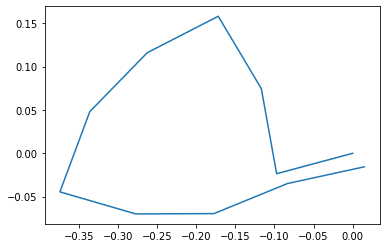

In [39]:
plt.plot(-fake_path[:,0],fake_path[:,1])